Source: https://cs231n.github.io/neural-networks-case-study/#grad

In [5]:
import numpy as np
import matplotlib.pyplot as plt

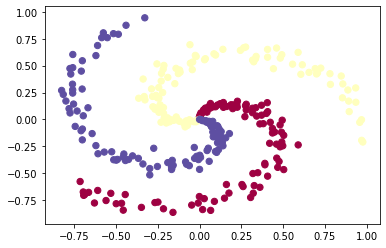

In [46]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

#### Linear Classification
- K: Labels or classes = 3
- D: Each sample is represented in 2 dimensions = [xi1, xi2]
- N: Total number of samples for each class = 100
- Classifier input contains 2 parameters
- Output layer(No hidden layer as this is linear classifier) contains 3 dimensions, one for each class
- Weight matrix size for input to output = (2,3)

In [45]:
#Weight matrix size for input to output layer = (2,3)
Wxh = np.random.randn(D,K)*0.01

#Bias vector
bh = np.random.randn(1,K)*0.01

#Step size & reg size
step_size = 1e-0
reg = 1e-3


#For 200 iterations:
for i in range(300):
    
    #Output unnormalized scores
    scores = np.dot(X,Wxh)+bh

    #Unnormalized probabilities
    exp_scores = np.exp(scores)

    #proababilities
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

    num_examples = X.shape[0]
    correct_logprobs = -np.log(probs[range(num_examples),y])

    # compute the loss: average cross-entropy loss and regularization
    reg = 1e-3 # regularization strength
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(Wxh*Wxh)
    loss = data_loss + reg_loss
    
    #Print the loss for every 10 iterations
    if i % 10 == 0:
        print("At iteration %d, loss is %f." % (i, loss))
    
    #Compute the gradients with respect to loss
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples    
    
    #Compute the correction in parameters
    dWxh = np.dot(X.T, dscores)
    dbh = np.sum(dscores, axis=0, keepdims=True)
    dWxh += reg*Wxh #Regularization gradient
    
    #Update the parameters
    Wxh += -step_size * dWxh
    bh += -step_size * dbh

At iteration 0, loss is 1.098922.
At iteration 10, loss is 0.901900.
At iteration 20, loss is 0.828955.
At iteration 30, loss is 0.795495.
At iteration 40, loss is 0.777836.
At iteration 50, loss is 0.767629.
At iteration 60, loss is 0.761351.
At iteration 70, loss is 0.757313.
At iteration 80, loss is 0.754629.
At iteration 90, loss is 0.752798.
At iteration 100, loss is 0.751523.
At iteration 110, loss is 0.750622.
At iteration 120, loss is 0.749976.
At iteration 130, loss is 0.749509.
At iteration 140, loss is 0.749167.
At iteration 150, loss is 0.748916.
At iteration 160, loss is 0.748730.
At iteration 170, loss is 0.748591.
At iteration 180, loss is 0.748488.
At iteration 190, loss is 0.748410.
At iteration 200, loss is 0.748352.
At iteration 210, loss is 0.748307.
At iteration 220, loss is 0.748274.
At iteration 230, loss is 0.748249.
At iteration 240, loss is 0.748229.
At iteration 250, loss is 0.748215.
At iteration 260, loss is 0.748203.
At iteration 270, loss is 0.748195.
At 

In [50]:
final_linear_scores = np.dot(X,Wxh) + bh
predicted_linear_class = np.argmax(final_linear_scores, axis =1 )
print('training accuracy: %.2f' % (np.mean(predicted_linear_class == y)))

training accuracy: 0.50


#### Classification using neural network
- K: Labels or classes = 3
- D: Each sample is represented in 2 dimensions = [xi1, xi2]
- N: Total number of samples for each class = 100
- h: Hidden layer size = 100
- Wxh: Weight matrix between input and hidden layer = (2,100)
- bh: Hidden layer bias = (1, 100)
- by: Output layer bias = (1,3)
- Why: Weight matrix between hiden layer and output = (100,3)
- Classifier input contains 2 parameters
- Output layer(No hidden layer as this is linear classifier) contains 3 dimensions, one for each class

In [53]:
# initialize parameters randomly
h = 100 # size of hidden layer
Wxh = 0.01 * np.random.randn(D,h)
bh = np.zeros((1,h))
Why = 0.01 * np.random.randn(h,K)
by = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, Wxh) + bh) # note, ReLU activation
    scores = np.dot(hidden_layer, Why) + by

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(Wxh*Wxh) + 0.5*reg*np.sum(Why*Why)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dWhy = np.dot(hidden_layer.T, dscores)
    dby = np.sum(dscores, axis=0, keepdims=True)
    
    # next backprop into hidden layer
    dhidden = np.dot(dscores, Why.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dWxh = np.dot(X.T, dhidden)
    dbh = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dWhy += reg * Why
    dWxh += reg * Wxh

    # perform a parameter update
    Wxh += -step_size * dWxh
    bh += -step_size * dbh
    Why += -step_size * dWhy
    by += -step_size * dby

iteration 0: loss 1.098684
iteration 1000: loss 0.289187
iteration 2000: loss 0.256957
iteration 3000: loss 0.246110
iteration 4000: loss 0.241001
iteration 5000: loss 0.239843
iteration 6000: loss 0.239520
iteration 7000: loss 0.239311
iteration 8000: loss 0.239184
iteration 9000: loss 0.239054


In [55]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, Wxh) + bh)
final_nn_scores = np.dot(hidden_layer, Why) + by
predicted_nn_class = np.argmax(final_nn_scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_nn_class == y)))

training accuracy: 0.99
